In [1]:
import time
start = time.clock()

In [1]:
import yt
import os
import H5
import re
import SimulationIO as SIO
import RegionCalculus as RC
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

/home/jmiller/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Data Inspection

In [2]:
base_dir='/home/jmiller/programming/SimulationIO-yt-tests'
source_dir=base_dir+'/'+'cactus'

fname = "e25b13-re2k5xy"
fname += '.s5'
fpath=source_dir+'/'+fname

iterations = [940544,941056,941568,942080,
              942592,943104,943616,44128,944640]
iteration = iterations[0]
timelevel = 0

configurationname='iteration.{:0>10}-timelevel.{}'.format(iteration,
                                                          timelevel)
print fpath
print configurationname

/home/jmiller/programming/SimulationIO-yt-tests/cactus/e25b13-re2k5xy.s5
iteration.0000940544-timelevel.0


In [3]:
dds = np.array([64,64,64])
left_edge = np.array([-3840,-3840,-3840]) - 3*dds
print left_edge,dds

[-4032 -4032 -4032] [64 64 64]


In [4]:
ds = yt.load(fpath,
             domain_left_edge=left_edge,
             domain_dds=dds,
             configuration=configurationname)

yt : [INFO     ] 2016-05-16 16:13:39,199 SimulationIO: Configuration "iteration.0000940544-timelevel.0"
/home/jmiller/.local/lib/python2.7/site-packages/yt-3.3.dev0-py2.7-linux-x86_64.egg/yt/frontends/simulationio/data_structures.py:430: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if np.all(self.domain_left_edge == None)\
/home/jmiller/.local/lib/python2.7/site-packages/yt-3.3.dev0-py2.7-linux-x86_64.egg/yt/frontends/simulationio/data_structures.py:433: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if np.all(self.domain_left_edge != None)\
/home/jmiller/.local/lib/python2.7/site-packages/yt-3.3.dev0-py2.7-linux-x86_64.egg/yt/frontends/simulationio/data_structures.py:434: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  and np.all(self._domain_dds == None):
/home/jmiller/.local/lib/python2.7/site-packages/yt-3.3.dev0-py2.7-li

ValueError: There is no ghost zone information!
sio dataset must either contain active regions
or you must input a number of ghost zones.
if there are no ghost_zones, set ghost_zones=0.

In [5]:
ds.print_stats()

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	   256	       8388608	           204
  1	   256	       2048000	           127
  2	   256	       2309120	           133
  3	   256	       2526720	           137
  4	   256	       2984960	           144
  5	   256	       3910400	           158
  6	   256	       4199040	           162
----------------------------------------------
   	  1792	      26366848


t = 0.00000000e+00 = 0.00000000e+00 s = 0.00000000e+00 years

Smallest Cell:
	Width: 4.051e-24 Mpc
	Width: 4.051e-18 pc
	Width: 8.356e-13 AU
	Width: 1.250e+01 cm


In [6]:
maxrefined = [g for g in ds.index.grids if g.Level==6]

In [7]:
def get_size(g,d):
    return g.ActiveDimensions[d]

In [8]:
xsizes = sorted(set([get_size(g,0) for g in maxrefined]))
ysizes = sorted(set([get_size(g,1) for g in maxrefined]))
zsizes = sorted(set([get_size(g,2) for g in maxrefined]))

In [9]:
print xsizes
print ysizes
print zsizes

[12, 19, 21, 23, 27, 28, 29]
[18, 20, 24, 25, 26]
[23, 27, 30, 38, 42]


In [10]:
maxrefined[0].ds

<weakproxy at 0x7fcff7d809f0 to SimulationIODataset at 0x7fd0283b8b90>

yt : [INFO     ] 2016-05-15 16:54:06,498 Reading 234082 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-05-15 16:54:08,125 xlim = -25.000000 25.000000
yt : [INFO     ] 2016-05-15 16:54:08,126 ylim = -25.000000 25.000000
yt : [INFO     ] 2016-05-15 16:54:08,128 xlim = -25.000000 25.000000
yt : [INFO     ] 2016-05-15 16:54:08,128 ylim = -25.000000 25.000000
yt : [INFO     ] 2016-05-15 16:54:08,130 Making a fixed resolution buffer of (('simulationio', 'HYDROBASE::rho')) 800 by 800
yt : [INFO     ] 2016-05-15 16:54:08,972 Saving plot bns-sliceplot-it-16384.png



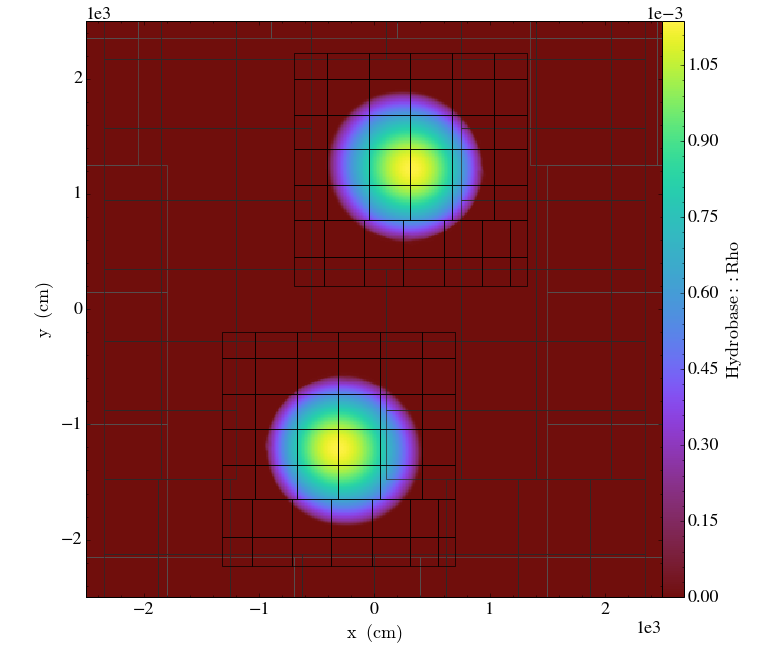

In [11]:
p = yt.SlicePlot(ds,'z','HYDROBASE::rho',center = [0,0,0],width=50)
p.set_log('HYDROBASE::rho',False)
p.annotate_grids()
p.save('bns-sliceplot-it-{}.png'.format(iteration))
p.show()

yt : [INFO     ] 2016-05-15 16:54:09,915 xlim = -50.000000 50.000000
yt : [INFO     ] 2016-05-15 16:54:09,916 ylim = -50.000000 50.000000
yt : [INFO     ] 2016-05-15 16:54:09,918 xlim = -50.000000 50.000000
yt : [INFO     ] 2016-05-15 16:54:09,919 ylim = -50.000000 50.000000
yt : [INFO     ] 2016-05-15 16:54:09,920 Making a fixed resolution buffer of (('index', 'grid_level')) 800 by 800
yt : [INFO     ] 2016-05-15 16:54:10,521 Saving plot bns-gridlevel-it-16384.png



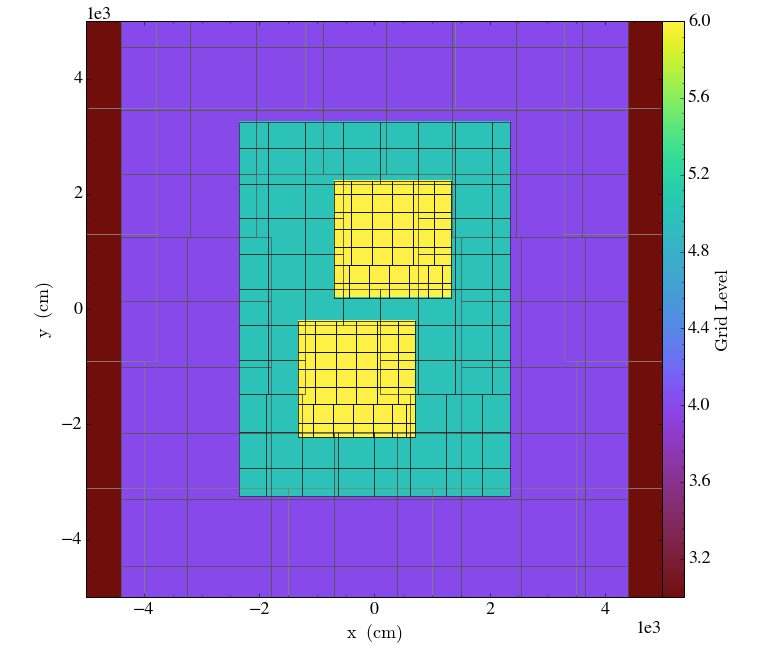

In [12]:
p = yt.SlicePlot(ds,'z','grid_level',center = [0,0,0],width=100)
p.set_log('grid_level',False)
p.annotate_grids()
p.save('bns-gridlevel-it-{}.png'.format(iteration))
p.show()

In [13]:
c = [0,0,0]
L = [0,0,1]
W = 50
image = yt.OffAxisProjectionPlot(ds,L,'HYDROBASE::rho',c,width=W)

yt : [INFO     ] 2016-05-15 16:54:11,042 xlim = -0.012207 0.012207
yt : [INFO     ] 2016-05-15 16:54:11,042 ylim = -0.012207 0.012207
yt : [INFO     ] 2016-05-15 16:54:11,043 zlim = -0.500000 0.500000
yt : [INFO     ] 2016-05-15 16:54:11,044 Making a fixed resolution buffer of (('simulationio', 'HYDROBASE::rho')) 800 by 800
yt : [INFO     ] 2016-05-15 16:54:11,045 Creating default volume
yt : [INFO     ] 2016-05-15 16:54:11,778 Reading 27900 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-05-15 16:54:11,789 Reading 29700 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-05-15 16:54:11,800 Reading 30690 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-05-15 16:54:11,813 Reading 32670 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-05-15 16:54:11,825 Reading 30690 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-05-15 16:54:11,837 Reading 32670 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-05-15 16:54:11,851 Reading 30690 cells fo

yt : [INFO     ] 2016-05-15 16:54:57,501 Saving plot bns-off-axis-projection-plot-it-16384.png



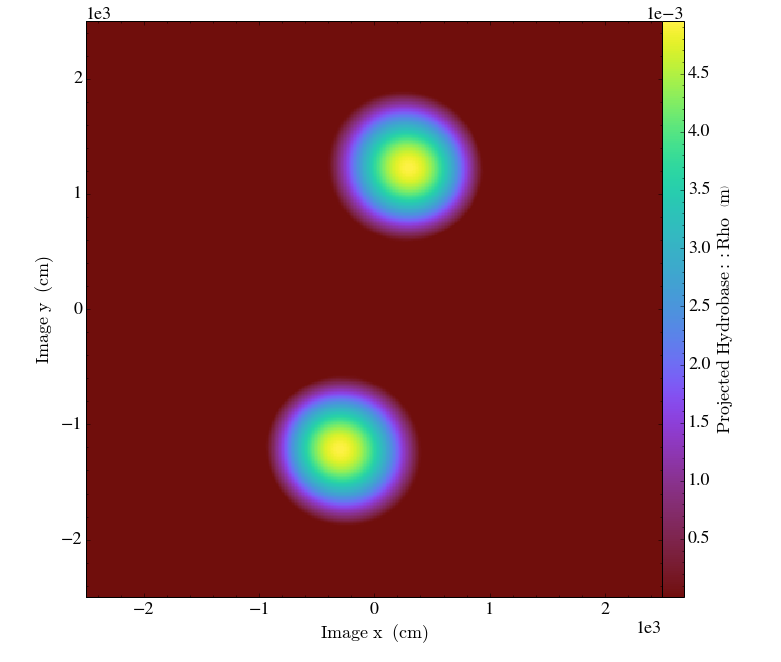

In [14]:
image.set_log('HYDROBASE::rho',False)
image.save('bns-off-axis-projection-plot-it-{}.png'.format(iteration))
image.show()

In [15]:
end = time.clock()

In [16]:
elapsed = end - start
print "elapsed time = {}    seconds".format(elapsed)
print "\t  or = {} minutes".format(elapsed/60.)

elapsed time = 93.498873    seconds
	  or = 1.55831455 minutes
